In [143]:
import tensorflow as tf

In [144]:
def conv_block(x,filters):
    c1 = tf.keras.layers.Conv2D(filters,3,activation = 'relu',padding='same')(x)
    c2 = tf.keras.layers.Conv2D(filters,3,activation = 'relu', padding = 'same')(c1)
    bn = tf.keras.layers.BatchNormalization()(c2)
    mp = tf.keras.layers.MaxPooling2D()(bn)
    return mp

def deconv_block(x,filters):
    c1 = tf.keras.layers.Conv2D(filters,3,activation = 'relu',padding='same')(x)
    c2 = tf.keras.layers.Conv2D(filters,3,activation = 'relu', padding = 'same')(c1)
    c3 = tf.keras.layers.Conv2D(filters,3,activation = 'relu', padding = 'same')(c2)
    c4 = tf.keras.layers.Conv2D(filters,3,activation = 'relu', padding = 'same')(c3)
    bn = tf.keras.layers.BatchNormalization()(c2)
    tc1 = tf.keras.layers.UpSampling2D((2, 2))(bn)
    return tc1

In [145]:
inp = tf.keras.Input((128,128,3))

In [158]:
cb1 = conv_block(inp,32)
cb2 = conv_block(cb1,64)
cb3 =conv_block(cb2,128)
cb4 =conv_block(cb3,256)
cb5 = conv_block(cb4,512)
cb6 = conv_block(cb5,512)
cb7 = conv_block(cb6,768)
flatten = tf.keras.layers.Flatten()(cb7)
reshaped = tf.keras.layers.Reshape((16, 16, 3))(flatten)
tcb1 = deconv_block(reshaped,128)
tcb2 = deconv_block(tcb1,256)
tcb3=deconv_block(tcb2,3)

In [159]:
model = tf.keras.models.Model(inputs=inp,outputs=tcb3)
model.summary()

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_559 (Conv2D)         (None, 128, 128, 32)      896       
                                                                 
 conv2d_560 (Conv2D)         (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_229 (Ba  (None, 128, 128, 32)     128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_169 (MaxPooli  (None, 64, 64, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_561 (Conv2D)         (None, 64, 64, 64)        184

In [187]:
import glob
paths=glob.glob(r'C:\Users\akash\FILES\Research\V2F\Face_Det\*\*\*')

In [149]:
len(paths)%100 *5

95

In [150]:
import numpy as np
np.random.shuffle(paths)

In [188]:
test = paths[:95]
train = paths[95:]
test = [t+'\n' for t in test]
train = [t+'\n'for t in train]

In [189]:
import cv2
def read(p):
    img=cv2.imread(p.split('\n')[0])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=  cv2.resize(img,(128,128))
    img=img/255.
    return img

In [190]:
train_imgs =[]
for t in train:
    train_imgs.append(read(t))

In [191]:
train_imgs =np.array(train_imgs)

In [161]:
model.compile(optimizer='adam',loss='mse',metrics='mse')


In [162]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("encoder_models/encoder_decoder_{epoch}_{val_mse:3f}.h5",monitor='val_mse',save_best_only=True)
]
model.fit(train_imgs,train_imgs,batch_size=64,epochs=100,validation_split=0.1,callbacks=callbacks)


Epoch 1/100
66/66 [==============================] - 12s 143ms/step - loss: 0.8746 - mse: 0.8746 - val_loss: 8.4017 - val_mse: 8.4017
Epoch 2/100
66/66 [==============================] - 8s 116ms/step - loss: 0.6851 - mse: 0.6851 - val_loss: 0.3251 - val_mse: 0.3251
Epoch 3/100
66/66 [==============================] - 8s 118ms/step - loss: 0.5530 - mse: 0.5530 - val_loss: 0.0557 - val_mse: 0.0557
Epoch 4/100
66/66 [==============================] - 7s 112ms/step - loss: 0.4454 - mse: 0.4454 - val_loss: 0.1095 - val_mse: 0.1095
Epoch 5/100
66/66 [==============================] - 7s 113ms/step - loss: 0.3592 - mse: 0.3592 - val_loss: 0.0657 - val_mse: 0.0657
Epoch 6/100
66/66 [==============================] - 7s 113ms/step - loss: 0.2896 - mse: 0.2896 - val_loss: 0.0892 - val_mse: 0.0892
Epoch 7/100
66/66 [==============================] - 7s 113ms/step - loss: 0.2319 - mse: 0.2319 - val_loss: 0.0953 - val_mse: 0.0953
Epoch 8/100
66/66 [==============================] - 7s 113ms/step -

66/66 [==============================] - 8s 117ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 63/100
66/66 [==============================] - 8s 116ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 64/100
66/66 [==============================] - 8s 116ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 65/100
66/66 [==============================] - 8s 117ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 66/100
66/66 [==============================] - 8s 117ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 67/100
66/66 [==============================] - 8s 116ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 68/100
66/66 [==============================] - 8s 116ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 69/100
66/66 [==============================] - 8s 117ms/step - loss:

In [166]:
test_imgs =[]
for t in test:
    test_imgs.append(read(t))

In [89]:
np.array(test_imgs).shape

(95, 128, 128, 3)

In [204]:
model = tf.keras.models.load_model('encoder_models\encoder_decoder_35_0.006708.h5')

In [205]:
op = model.predict(np.array(test_imgs[:5]))

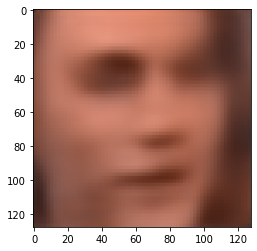

In [210]:
import matplotlib.pyplot as plt
plt.imshow(op[3])

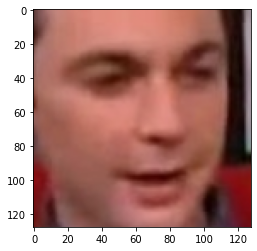

In [211]:
plt.imshow(test_imgs[3].astype('float'))

In [212]:
model2 = tf.keras.models.Model(inputs = model.input , outputs =[model.get_layer('flatten_16').output])

In [213]:
model2.summary()

Model: "model_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_559 (Conv2D)         (None, 128, 128, 32)      896       
                                                                 
 conv2d_560 (Conv2D)         (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_229 (Ba  (None, 128, 128, 32)     128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_169 (MaxPooli  (None, 64, 64, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_561 (Conv2D)         (None, 64, 64, 64)        184

In [221]:
vectors_test = model2.predict(np.array(test_imgs))

In [222]:
vectors_train[0].shape

(768,)

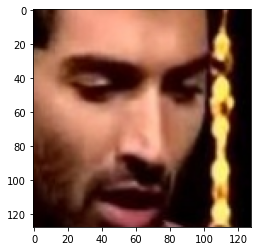

In [223]:
plt.imshow(train_imgs[0])

In [224]:
train[0]

'C:\\Users\\akash\\FILES\\Research\\V2F\\Face_Det\\id00081\\vvLu_7TpP8c\\00203.jpg\n'

In [229]:
import pandas as pd
df = pd.DataFrame(list(zip(test, vectors_test)),
               columns =['path', 'vec'])

In [226]:
df

,path,vec
0,C:\Users\akash\FILES\Research\V2F\Face_Det\id0...,"[0.009111169, 1.0132456, 0.043867785, -0.01357..."
1,C:\Users\akash\FILES\Research\V2F\Face_Det\id0...,"[0.009111169, 2.2058063, 0.043867785, -0.01357..."
2,C:\Users\akash\FILES\Research\V2F\Face_Det\id0...,"[0.009111169, 1.4876466, 0.043867785, -0.01357..."
3,C:\Users\akash\FILES\Research\V2F\Face_Det\id0...,"[0.009111169, 1.4959506, 0.043867785, -0.01357..."
4,C:\Users\akash\FILES\Research\V2F\Face_Det\id0...,"[0.009111169, 1.5891721, 0.043867785, -0.01357..."
...,...,...
4619,C:\Users\akash\FILES\Research\V2F\Face_Det\id0...,"[0.009111169, 2.1410556, 0.043867785, -0.01357..."
4620,C:\Users\akash\FILES\Research\V2F\Face_Det\id0...,"[0.009111169, 3.9638603, 0.043867785, -0.01357..."
4621,C:\Users\akash\FILES\Research\V2F\Face_Det\id0...,"[0.009111169, 2.0237913, 0.043867785, -0.01357..."
4622,C:\Users\akash\FILES\Research\V2F\Face_Det\id0...,"[0.009111169, 1.5040145, 0.043867785, -0.01357..."


In [230]:
df.to_csv('vectors_test.csv')
df.to_json('vectors_test.json')